In [65]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [66]:
data_dir = '/Users/jakebentley/Desktop/Cells'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=1,
  image_size=(180, 180),
  batch_size= 5)

Found 4881 files belonging to 2 classes.
Using 3905 files for training.


In [67]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=1,
  image_size=(180, 180),
  batch_size=10)

Found 4881 files belonging to 2 classes.
Using 976 files for validation.


In [68]:
class_names = train_ds.class_names
print(class_names)

['erythroblast', 'neutrophil']


In [69]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(5, 180, 180, 3)
(5,)


In [70]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [71]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [72]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 90, 90, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 45, 45, 64)       

In [74]:
epochs = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    steps_per_epoch = 10
)

Epoch 1/10
10/10 [==============================] - 5s 463ms/step - loss: 1.2669 - accuracy: 0.5400 - val_loss: 0.6938 - val_accuracy: 0.3084
Epoch 2/10
10/10 [==============================] - 4s 431ms/step - loss: 0.5117 - accuracy: 0.7600 - val_loss: 0.7617 - val_accuracy: 0.6967
Epoch 3/10
10/10 [==============================] - 4s 433ms/step - loss: 0.7818 - accuracy: 0.6800 - val_loss: 0.6150 - val_accuracy: 0.6967
Epoch 4/10
10/10 [==============================] - 4s 437ms/step - loss: 0.6595 - accuracy: 0.6600 - val_loss: 0.6693 - val_accuracy: 0.6967
Epoch 5/10
10/10 [==============================] - 4s 432ms/step - loss: 0.6678 - accuracy: 0.6800 - val_loss: 0.6430 - val_accuracy: 0.6967
Epoch 6/10
10/10 [==============================] - 4s 435ms/step - loss: 0.5862 - accuracy: 0.7600 - val_loss: 0.6352 - val_accuracy: 0.6967
Epoch 7/10
10/10 [==============================] - 4s 438ms/step - loss: 0.5681 - accuracy: 0.7600 - val_loss: 0.6112 - val_accuracy: 0.6967
Epoch 

Text(0, 0.5, 'Accuracy')

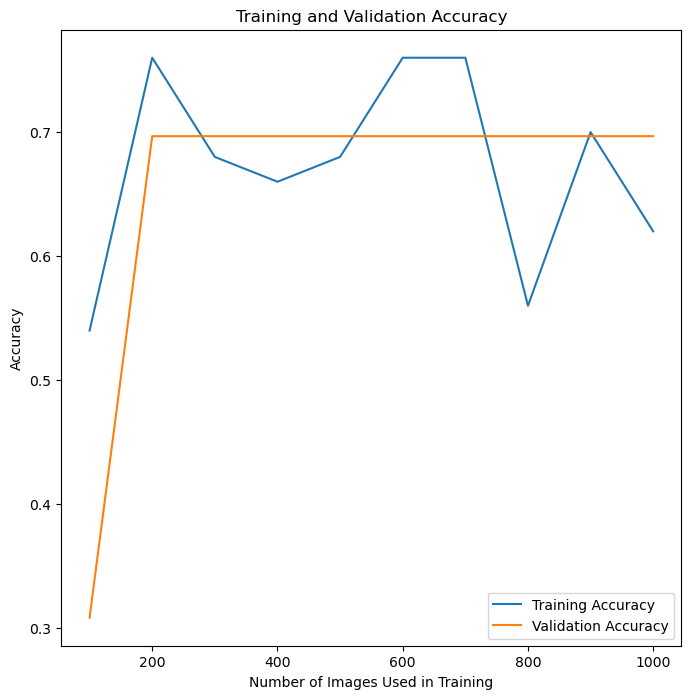

In [75]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
my_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

my_list = [1,2,3,4,5,6,7,8,9,10]
list_range = [i * (10 * 10) for i in my_list]


plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
plt.plot(list_range, acc, label='Training Accuracy')
plt.plot(list_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Number of Images Used in Training")
plt.ylabel("Accuracy")

In [ ]:
Some of the disadvantages of CNNs: include the fact that a lot of training data is needed for the CNN to be effective 
    and that they fail to encode the position and orientation of objects.

They fail to encode the position and orientation of objects. They have a hard time classifying images 
with different positions.

A lot of training data is needed for the CNN to be effective.

CNNs tend to be much slower because of operations like maxpool.

In case the convolutional neural network is made up of multiple layers, the training process could take a
particularly long time if the computer does not have a good GPU.

Convolutional neural networks will recognize the image as clusters of pixels which are arranged in distinct
patterns. They don’t understand them as components present in the image.


CNN would have a hard time being like oh this style of cell nuclius follows this structure